In [1]:
import numpy as np
import glob
import os

# for plotting
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
#from matplotlib.colors import LogNorm
%matplotlib inline

from PIL import Image 
# Nedded for background fit
import numpy.polynomial.polynomial as poly
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import optimize

# needed for spotfinder
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters

# custom functions
from DefDefDefinitions import PE_Vals
from DefDefDefinitions import Image_Converter
from DefDefDefinitions import FrequencyFilterFunction
from DefDefDefinitions import FFT_Filter
from DefDefDefinitions import Unique_Circle
from DefDefDefinitions import Fit_2D_Gaussian
from DefDefDefinitions import gaussian_2d
from DefDefDefinitions import Spot_finder
from DefDefDefinitions import Spot_Area
from DefDefDefinitions import Step_fit
from DefDefDefinitions import Line_fit
from DefDefDefinitions import moving_average
from DefDefDefinitions import Trajectory

In [19]:
CWD = os.getcwd()
CWD = CWD+'/data/'
DIR = 'Exp/Copoly w Ba/+0/1'
Dir = CWD+DIR
print(Dir)

/Users/austinmcdonald/Desktop/slide-calabration/data/Exp/Copoly w Ba/+0/1


In [20]:
end = 50
DataFiles = glob.glob(Dir+'/*')
DataFiles.sort()
DataFiles = DataFiles[0:end]

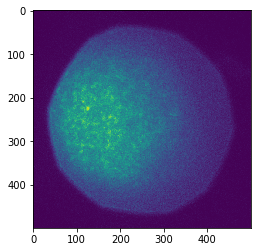

In [21]:
Row    = int(250)
Col    = Row
Yindex = int(256)
Xindex = int(256)
eOffset, eCoeff = PE_Vals(DataFiles[0])
Test = Image_Converter(DataFiles[0], eOffset, eCoeff, Xindex, Yindex, Row, Col)
plt.imshow(Test)

In [8]:
Shape = Test.shape[0]
SUMMED = np.zeros(Shape**2).reshape((Shape,Shape))
FreqCut=0.03
FreqCutWidth=0.04     
FilterArray = FrequencyFilterFunction(Shape,FreqCut,FreqCutWidth)

In [9]:
FRAMES = {}
for img in DataFiles:
    #DirName    = img.split('/')[-2]
    #FileName   = img.split('/')[-1]
    #FrameIndex = FileName.split('_')[-1].split('.tif')[0]
    #FrameName  = DirName+'_'+FrameIndex

    eOffset, eCoeff = PE_Vals(img)
    ReducedImage = Image_Converter(img, eOffset, eCoeff, Xindex, Yindex, Row, Col)
    SUMMED += ReducedImage
    
    #FRAMES[FrameName] = FFT_Filter(ReducedImage, FilterArray)
    
SUMMED = SUMMED/len(DataFiles)

In [14]:
KEY = FRAMES.keys()

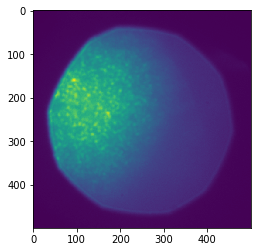

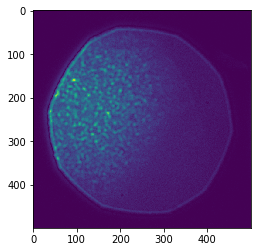

In [18]:
plt.imshow(SUMMED)
plt.show()
InvSlideFFT = FFT_Filter(SUMMED, FilterArray)

plt.imshow(InvSlideFFT)
plt.show()

In [22]:
CWD = os.getcwd()
CWD = CWD+'/data/'
DIR = 'Exp/Copoly w Ba/+0/1'
Dir = CWD+DIR
print(Dir)
end = 50
DataFiles = glob.glob(Dir+'/*')
DataFiles.sort()
DataFiles = DataFiles[0:end]

FRAMES = {}
for img in DataFiles:
    #DirName    = img.split('/')[-2]
    #FileName   = img.split('/')[-1]
    #FrameIndex = FileName.split('_')[-1].split('.tif')[0]
    #FrameName  = DirName+'_'+FrameIndex

    eOffset, eCoeff = PE_Vals(img)
    ReducedImage = Image_Converter(img, eOffset, eCoeff, Xindex, Yindex, Row, Col)
    SUMMED += ReducedImage
    
    #FRAMES[FrameName] = FFT_Filter(ReducedImage, FilterArray)
    
SUMMED = SUMMED/len(DataFiles)
wBA = FFT_Filter(SUMMED, FilterArray)


/Users/austinmcdonald/Desktop/slide-calabration/data/Exp/Copoly w Ba/+0/1


In [23]:
CWD = os.getcwd()
CWD = CWD+'/data/'
DIR = 'Exp/Copoly wo Ba/+0/1'
Dir = CWD+DIR
print(Dir)
end = 50
DataFiles = glob.glob(Dir+'/*')
DataFiles.sort()
DataFiles = DataFiles[0:end]

FRAMES = {}
for img in DataFiles:
    #DirName    = img.split('/')[-2]
    #FileName   = img.split('/')[-1]
    #FrameIndex = FileName.split('_')[-1].split('.tif')[0]
    #FrameName  = DirName+'_'+FrameIndex

    eOffset, eCoeff = PE_Vals(img)
    ReducedImage = Image_Converter(img, eOffset, eCoeff, Xindex, Yindex, Row, Col)
    SUMMED += ReducedImage
    
    #FRAMES[FrameName] = FFT_Filter(ReducedImage, FilterArray)
    
SUMMED = SUMMED/len(DataFiles)
nBA = FFT_Filter(SUMMED, FilterArray)


/Users/austinmcdonald/Desktop/slide-calabration/data/Exp/Copoly wo Ba/+0/1


In [24]:
CWD = os.getcwd()
CWD = CWD+'/data/'
DIR = 'Exp/Poly/+0/1'
Dir = CWD+DIR
print(Dir)
end = 50
DataFiles = glob.glob(Dir+'/*')
DataFiles.sort()
DataFiles = DataFiles[0:end]

FRAMES = {}
for img in DataFiles:
    #DirName    = img.split('/')[-2]
    #FileName   = img.split('/')[-1]
    #FrameIndex = FileName.split('_')[-1].split('.tif')[0]
    #FrameName  = DirName+'_'+FrameIndex

    eOffset, eCoeff = PE_Vals(img)
    ReducedImage = Image_Converter(img, eOffset, eCoeff, Xindex, Yindex, Row, Col)
    SUMMED += ReducedImage
    
    #FRAMES[FrameName] = FFT_Filter(ReducedImage, FilterArray)
    
SUMMED = SUMMED/len(DataFiles)
pol = FFT_Filter(SUMMED, FilterArray)


/Users/austinmcdonald/Desktop/slide-calabration/data/Exp/Poly/+0/1


In [25]:
CWD = os.getcwd()
CWD = CWD+'/data/'
DIR = 'Exp/Glass/+0/1'
Dir = CWD+DIR
print(Dir)
end = 50
DataFiles = glob.glob(Dir+'/*')
DataFiles.sort()
DataFiles = DataFiles[0:end]

FRAMES = {}
for img in DataFiles:
    #DirName    = img.split('/')[-2]
    #FileName   = img.split('/')[-1]
    #FrameIndex = FileName.split('_')[-1].split('.tif')[0]
    #FrameName  = DirName+'_'+FrameIndex

    eOffset, eCoeff = PE_Vals(img)
    ReducedImage = Image_Converter(img, eOffset, eCoeff, Xindex, Yindex, Row, Col)
    SUMMED += ReducedImage
    
    #FRAMES[FrameName] = FFT_Filter(ReducedImage, FilterArray)
    
SUMMED = SUMMED/len(DataFiles)
gla = FFT_Filter(SUMMED, FilterArray)


/Users/austinmcdonald/Desktop/slide-calabration/data/Exp/Glass/+0/1


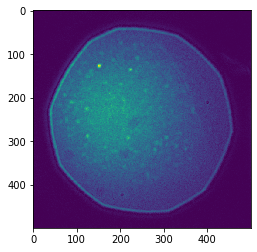

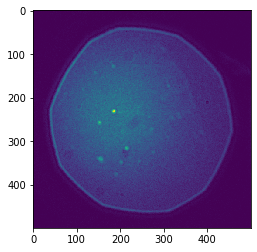

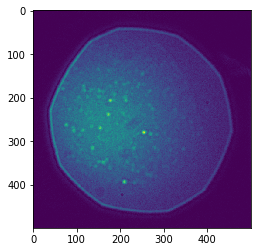

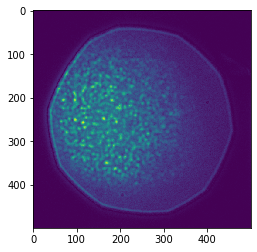

In [26]:
plt.imshow(gla)
plt.show()
plt.imshow(pol)
plt.show()
plt.imshow(nBA)
plt.show()
plt.imshow(wBA)
plt.show()

In [ ]:
,vmin=vm,vmax=vmm

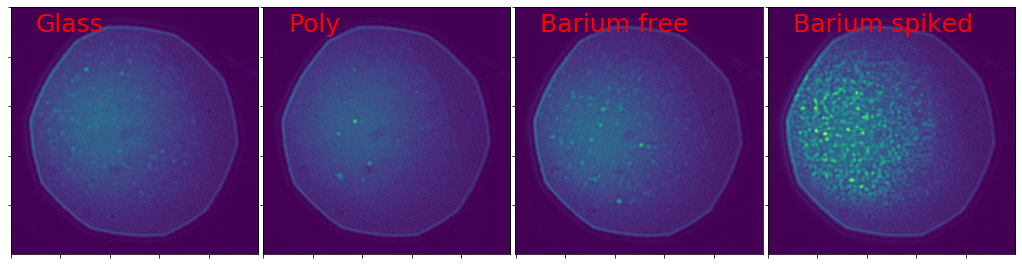

In [78]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(18,10))
fig.subplots_adjust(wspace=0.02)
vm  = 0.0
vmm = 75

ax1.imshow(gla,vmin=vm,vmax=vmm)
ax2.imshow(pol,vmin=vm,vmax=vmm)
ax3.imshow(nBA,vmin=vm,vmax=vmm)
ax4.imshow(wBA,vmin=vm,vmax=vmm)

ax1.text(50, 50, 'Glass',color='r',fontsize=25)
ax2.text(50, 50, 'Poly',color='r',fontsize=25)
ax3.text(50, 50, 'Barium free',color='r',fontsize=25)
ax4.text(50, 50, 'Barium spiked',color='r',fontsize=25)

ax1.set_xticklabels([1],fontsize=0)
ax1.set_yticklabels([1],fontsize=0)
ax2.set_xticklabels([1],fontsize=0)
ax3.set_xticklabels([1],fontsize=0)
ax4.set_xticklabels([1],fontsize=0)

#plt.savefig('Comp-ALL-images.png',dpi=400)
plt.show()

ValueError: not enough values to unpack (expected 4, got 2)

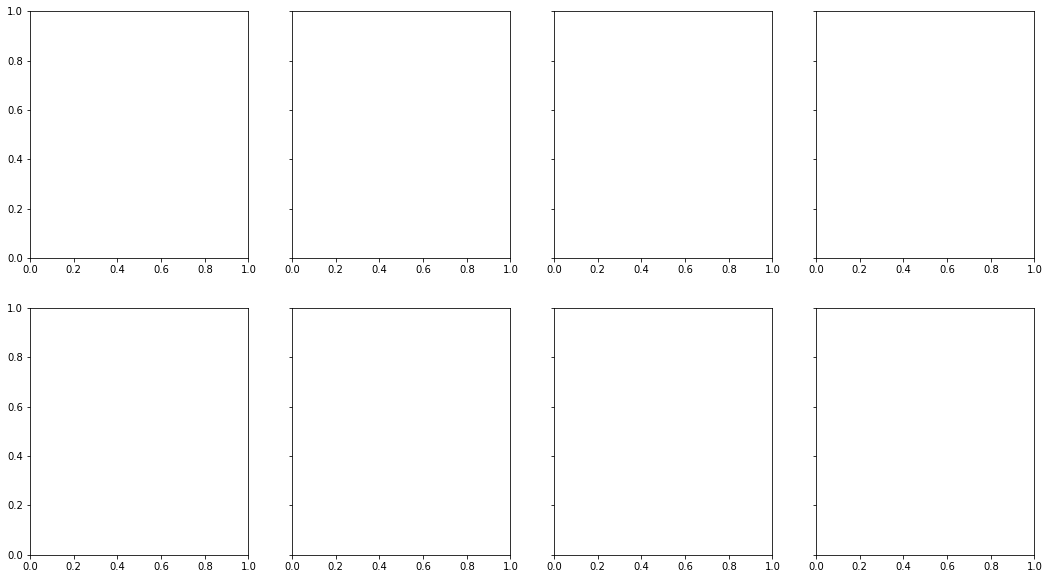

In [77]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(2, 2, sharey=True, figsize=(18,10))
fig.subplots_adjust(wspace=0.02)
vm  = 0.0
vmm = 75

ax1.imshow(gla,vmin=vm,vmax=vmm)
ax2.imshow(pol,vmin=vm,vmax=vmm)
ax3.imshow(nBA,vmin=vm,vmax=vmm)
ax4.imshow(wBA,vmin=vm,vmax=vmm)

ax1.text(50, 50, 'Glass',color='r',fontsize=25)
ax2.text(50, 50, 'Poly',color='r',fontsize=25)
ax3.text(50, 50, 'Barium free',color='r',fontsize=25)
ax4.text(50, 50, 'Barium spiked',color='r',fontsize=25)

ax1.set_xticklabels([1],fontsize=0)
ax1.set_yticklabels([1],fontsize=0)
ax2.set_xticklabels([1],fontsize=0)
ax3.set_xticklabels([1],fontsize=0)
ax4.set_xticklabels([1],fontsize=0)

#plt.savefig('Comp-ALL-images.png',dpi=400)
plt.show()

In [42]:
print(np.min(gla))
print(np.min(pol))
print(np.min(nBA))
print(np.min(wBA))

2.5237137285483157e-06
4.717668274906828e-06
8.950172897073117e-06
2.1364238159549135e-07


In [43]:
print(np.max(gla))
print(np.max(pol))
print(np.max(nBA))
print(np.max(wBA))

46.69542939992197
56.809781420440125
54.383215299927606
74.50275181481985


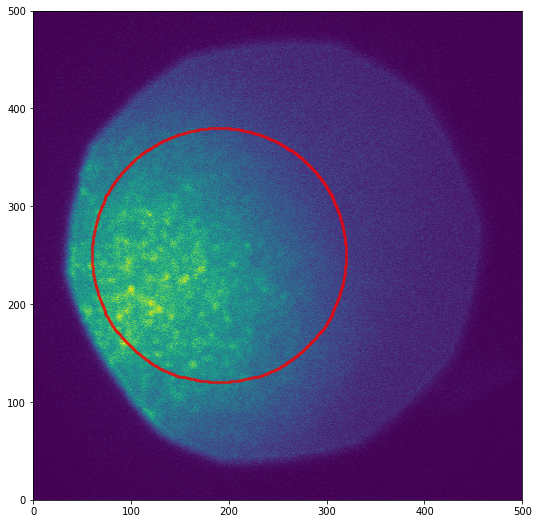

In [6]:
Row    = int(250)
Col    = Row
Yindex = int(256)
Xindex = int(256)

eOffset, eCoeff = PE_Vals(DataFiles[0])
Test = Image_Converter(DataFiles[0], eOffset, eCoeff, Xindex, Yindex, Row, Col)
Shape = Test.shape[0]

plt.figure(figsize=(9,9))

r = 130
Xoff = 190
Yoff = 250

X_circle, Y_circle = Unique_Circle(r, Xoff, Yoff)
keep = np.where(Y_circle<Shape)
Y_circle = Y_circle[keep]
X_circle = X_circle[keep]
keep = np.where(X_circle<Shape)
Y_circle = Y_circle[keep]
X_circle = X_circle[keep]

plt.scatter(X_circle,Y_circle,color='r',lw=2,alpha=0.4,s=1)

plt.imshow(Test)
plt.xlim(0,500)
plt.ylim(0,500)
plt.show()